In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np

from tensorflow.keras import regularizers

Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualize the dataset

Target labels:  [2 9 4 1 8 0 8 4 7 0]


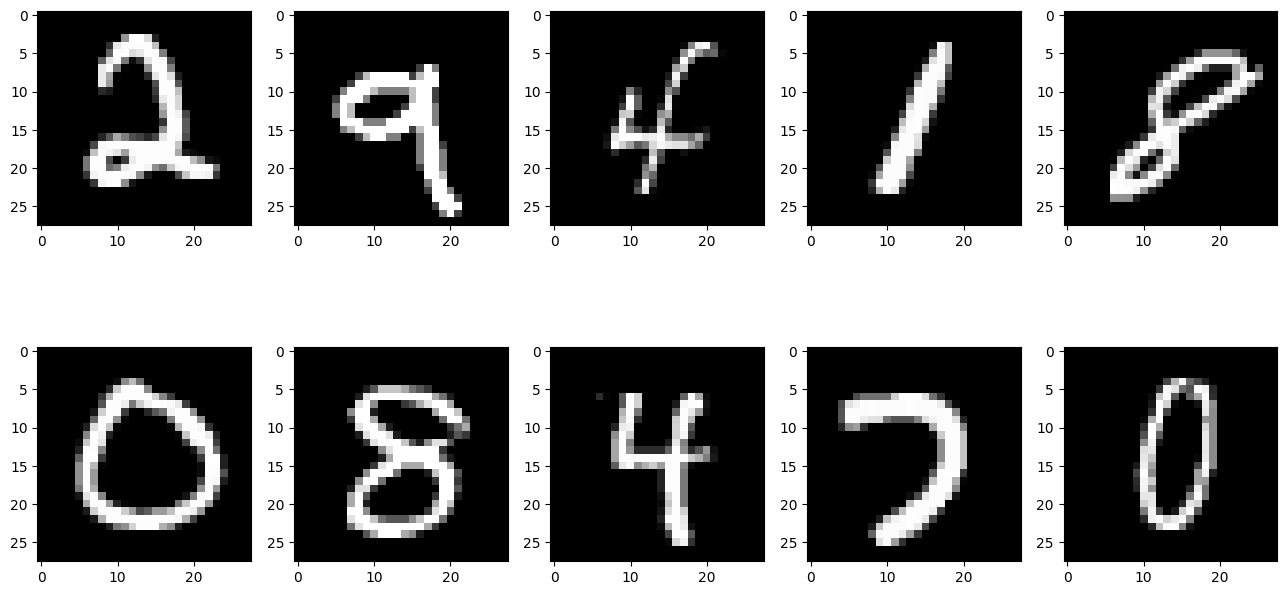

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

***⭕ Add L1 and L2 regularization***

In [5]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

# L1 regularization example: regularizers.l1(0.001)
# L2 regularization example: regularizers.l2(0.001)
# L1 + L2 together: regularizers.l1_l2(l1=0.001, l2=0.001)

model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(32, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [7]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8094 - loss: 1.7080
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9185 - loss: 0.7513
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9297 - loss: 0.6187
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9350 - loss: 0.5651
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9376 - loss: 0.5282
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9383 - loss: 0.5052
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9420 - loss: 0.4842
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9441 - loss: 0.4706
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9440 - loss: 0.4551
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9445 - loss: 0.4463


Plot the loss and accuracy graphs

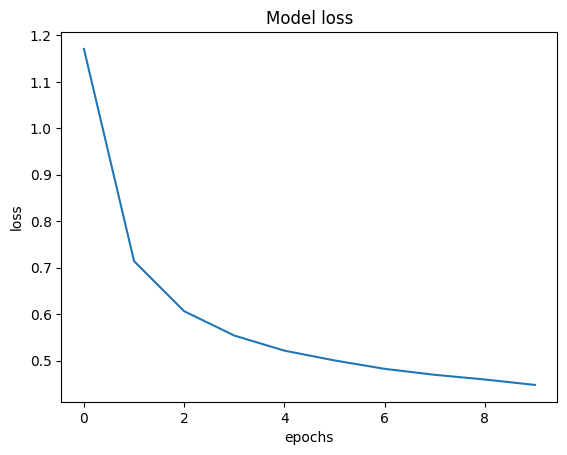

In [8]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

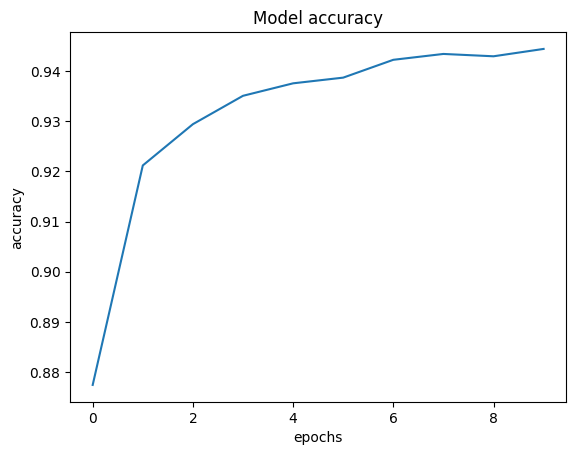

In [9]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [10]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9383 - loss: 0.4674
Loss of the Test dataset is: 0.4397360384464264
Accuracy of the test dataset is: 0.9458000063896179


⭕ After adding L1 and L2 regularization, the test accuracy decreased slightly. This occurred because regularization limits large weights, encouraging the model to learn simpler patterns. While this can enhance the model’s ability to generalize, it may also lead to a small reduction in accuracy on the test set

Save the model weights

In [ ]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

**3 ) C**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


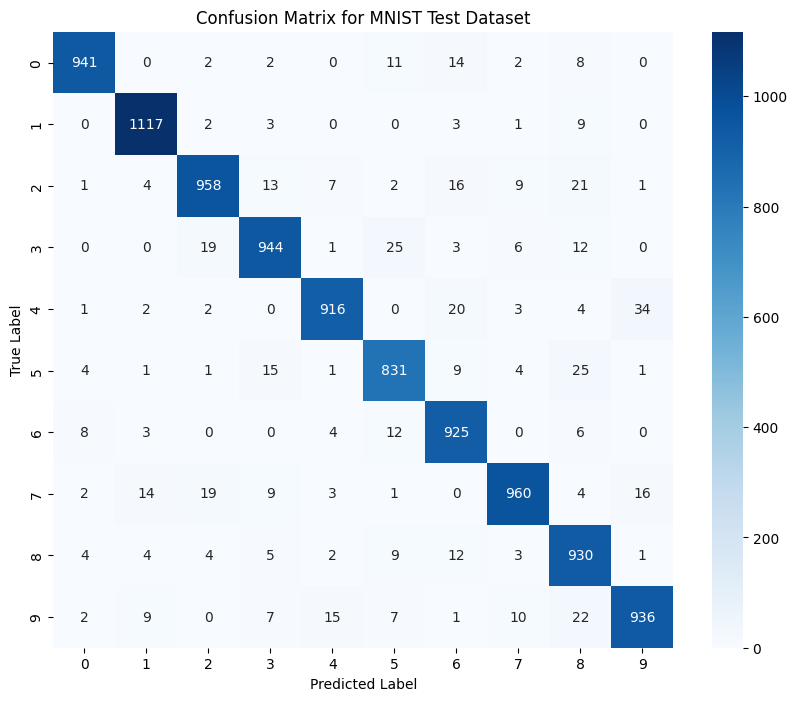

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict classes for test dataset
y_pred = model.predict(new_test_data)       # gives probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # convert probabilities to class numbers
y_true = np.argmax(new_test_target, axis=1) # true labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MNIST Test Dataset')
plt.show()